In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import random

In [2]:
random.seed(1)

data_dir = './GSE61260/'

In [3]:
df = pd.read_csv(os.path.join(data_dir, 'combined.csv'))

df.head()

,Sample_ID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283907,ENSG00000283913,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552,Disease,characteristics_ch1_bmi
0,GSM1501013,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,...,3.031789,0.903138,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849,normal control,27.1
1,GSM1501014,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,...,1.819534,-0.021741,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320,healthy obese,30.5
2,GSM1501015,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,...,1.914932,0.424076,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879,normal control,25.3
3,GSM1501016,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,...,1.313128,0.501803,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271,normal control,25.8
4,GSM1501017,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,...,4.507792,0.120017,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463,normal control,23.5


In [4]:
le = LabelEncoder()

y = le.fit_transform(df['Disease'])

X = df.drop(columns = ['Sample_ID', 'Disease'])
X.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283787,ENSG00000283907,ENSG00000283913,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552,characteristics_ch1_bmi
0,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,3.010408,...,-0.246719,3.031789,0.903138,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849,27.1
1,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,3.464364,...,0.040158,1.819534,-0.021741,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320,30.5
2,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,2.829070,...,-0.248596,1.914932,0.424076,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879,25.3
3,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,2.733645,...,-0.086860,1.313128,0.501803,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271,25.8
4,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,2.708227,...,0.337941,4.507792,0.120017,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463,23.5


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(X_test.shape)

unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts)

unique, counts = np.unique(y_test, return_counts=True)
print(unique, counts)


(106, 21662)
(27, 21662)
[0 1 2 3 4 5] [19 18 19 30  9 11]
[0 1 2 3 4 5] [5 5 4 8 2 3]


In [ ]:
pipeline_steps = [
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
]
pipeline = ImbPipeline(pipeline_steps)


Starting RandomizedSearchCV on Pipeline...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV on Pipeline complete.

Best hyperparameters found for the pipeline:
{'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 0.1, 'classifier__max_depth': 15, 'classifier__bootstrap': True}

Best cross-validation score:
0.7196305282019567

Best Pipeline Model:
Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=15, max_features=0.1,
                                        min_samples_split=5,
                                        random_state=42))])

--- Evaluation of Best Tuned Pipeline on Test Set ---
Accuracy: 0.7407

Classification Report:
                precision    recall  f1-score   support

 healthy obese       0.67      0.40      0.50         5
         nafld       0.7

<Axes: >

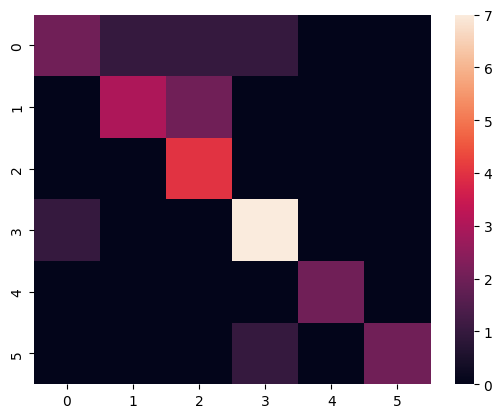

In [ ]:
param_dist = {

    'classifier__n_estimators': [100, 250, 500, 1000],

    'classifier__max_features': ['sqrt', 'log2', 0.05, 0.1], 
    
    'classifier__max_depth': [3, 5, 10, 15, 20, None],

    'classifier__min_samples_split': [2, 5, 10, 20],

    'classifier__min_samples_leaf': [1, 2, 5, 10],

    'classifier__bootstrap': [True] 
}
  
random_search_pipeline = RandomizedSearchCV(
    estimator=pipeline, 
    param_distributions=param_dist,
    scoring='f1_weighted',  
    n_iter=50, 
    cv=5, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1)

print("\nStarting RandomizedSearchCV on Pipeline...")
random_search_pipeline.fit(X_train, y_train)
print("RandomizedSearchCV on Pipeline complete.")

print("\nBest hyperparameters found for the pipeline:")
print(random_search_pipeline.best_params_)

print("\nBest cross-validation score:")
print(random_search_pipeline.best_score_)

best_pipeline_model = random_search_pipeline.best_estimator_
print("\nBest Pipeline Model:")
print(best_pipeline_model)

y_pred_tuned = best_pipeline_model.predict(X_test)

print("\n--- Evaluation of Best Tuned Pipeline on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=le.classes_))


best_scaler = best_pipeline_model.named_steps['scaler']
best_classifier = best_pipeline_model.named_steps['classifier']

conf_matrix = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix)


--- Top 20 Most Relevant Features ---
                       feature  importance
21661  characteristics_ch1_bmi    0.056327
18396          ENSG00000210191    0.017955
15949          ENSG00000196177    0.012627
17593          ENSG00000203875    0.011613
8849           ENSG00000149357    0.010938
7812           ENSG00000141448    0.010755
3875           ENSG00000112183    0.010752
14025          ENSG00000179862    0.010331
13167          ENSG00000174943    0.010218
15051          ENSG00000185262    0.010097
8023           ENSG00000143183    0.009976
10876          ENSG00000164342    0.009616
6305           ENSG00000132196    0.008974
8747           ENSG00000148426    0.008520
13248          ENSG00000175336    0.008124
3187           ENSG00000106355    0.008048
12242          ENSG00000170323    0.007581
3833           ENSG00000111875    0.007026
17902          ENSG00000205485    0.006966
3395           ENSG00000108344    0.006945


<Axes: xlabel='importance', ylabel='feature'>

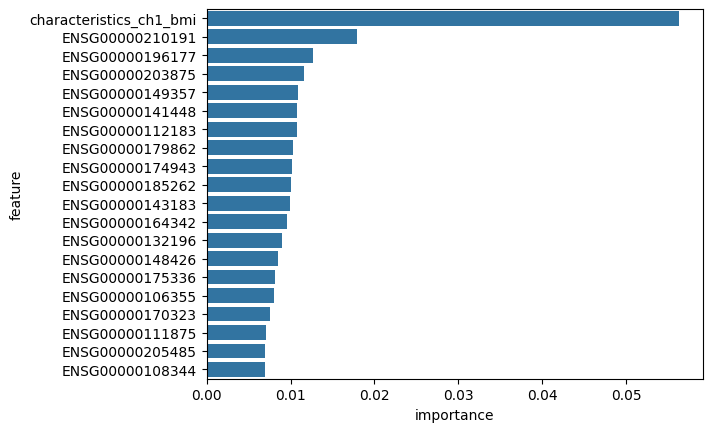

In [ ]:

best_classifier = best_pipeline_model.named_steps['classifier']
importances = best_classifier.feature_importances_

feature_names = X_train.columns.tolist()

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("\n--- Top 20 Most Relevant Features ---")
print(feature_importance_df.head(20))

sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
